In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv(r'C:\Users\Lakshmi\Desktop\Chicago\crime_data1.csv')
df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Time,Month,Day,Hour,Minute,Second
0,25953,JE240540,2021-05-24,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",15:06:00,5,24,15,6,0
1,26038,JE279849,2021-06-26,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",09:24:00,6,26,9,24,0


In [7]:
df.shape

(7979233, 28)

In [8]:
df['Primary Type'].nunique()

31

In [5]:
df['Description'].nunique()

549

In [6]:
df['Block'].nunique()

61728

In [9]:
block =df.groupby('Block')['Primary Type'].agg(lambda x: x.nunique())
sorted_blocks = block.sort_values(ascending=False)
sorted_blocks

Block
009XX W BELMONT AVE                    25
046XX N SHERIDAN RD                    24
064XX S DR MARTIN LUTHER KING JR DR    24
049XX N MILWAUKEE AVE                  24
007XX E 79TH ST                        24
                                       ..
016XX E 56th ST                         1
064XX S HALSTED PW                      1
016XX E 54TH PL                         1
016XX E 53RD st                         1
138XX S DOTY AVE W                      1
Name: Primary Type, Length: 61728, dtype: int64

                          Block  count
0              100XX W OHARE ST  16350
1              001XX N STATE ST  16043
2            076XX S CICERO AVE  10356
3              0000X N STATE ST   9526
4          008XX N MICHIGAN AVE   9498
...                         ...    ...
61723          018XX E 134TH ST      1
61724   114XX S 111TH ST I57 XR      1
61725   058XX S CENTRAL PARK AV      1
61726     110XX S COTTAGE GROVE      1
61727  015XX W Belle Plaine Ave      1

[61728 rows x 2 columns]


C:\Users\Good Day\AppData\Local\Temp\ipykernel_1200\2066386139.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Block, x= 'Block', y= 'count', ax=ax, width=0.75, palette='viridis')


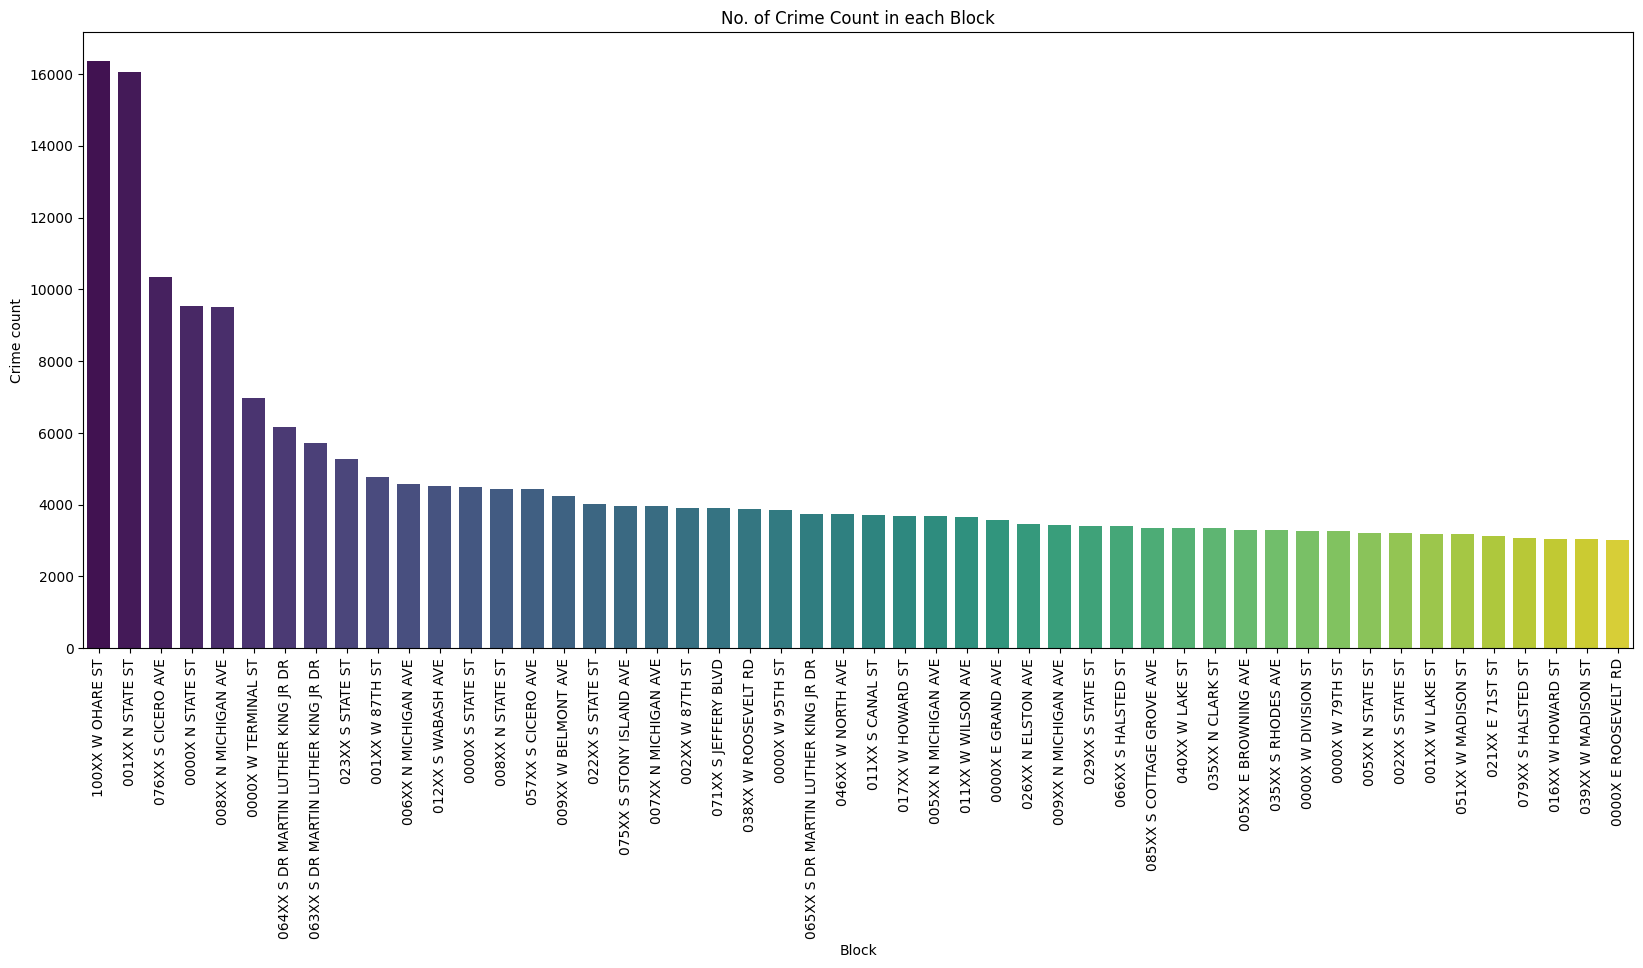

In [8]:
# Crime rate over in each block

Block=df['Block'].value_counts().reset_index()
Block.columns= ['Block', 'count']
print(Block)

Block=Block.sort_values(by='count', ascending=False)

# top 50 blocks to show
Block=Block.head(50)
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=Block, x= 'Block', y= 'count', ax=ax, width=0.75, palette='viridis')
plt.title('No. of Crime Count in each Block')
plt.xlabel('Block')
plt.ylabel('Crime count')
plt.xticks(rotation=90)
plt.show()

Since Block unique count is 60k+ and not contribute much to crime, so it is omitted for further analysis. 

In [9]:
iucr =df.groupby('IUCR')['Primary Type'].agg(lambda x: x.nunique())
iucr= iucr.sort_values(ascending=False)
iucr

IUCR
0110    1
1900    1
2019    1
2018    1
2017    1
       ..
1140    1
1135    1
1130    1
1122    1
9901    1
Name: Primary Type, Length: 403, dtype: int64

In [10]:
iucr_1 =df.groupby('Primary Type')['IUCR'].agg(lambda x: x.nunique())
iucr_1= iucr_1.sort_values(ascending=False)
iucr_1

Primary Type
NARCOTICS                            48
OTHER OFFENSE                        46
DECEPTIVE PRACTICE                   32
BATTERY                              30
CRIMINAL SEXUAL ASSAULT              30
THEFT                                26
GAMBLING                             19
WEAPONS VIOLATION                    15
PROSTITUTION                         15
OFFENSE INVOLVING CHILDREN           15
ASSAULT                              15
ROBBERY                              14
PUBLIC PEACE VIOLATION               14
INTERFERENCE WITH PUBLIC OFFICER     12
CRIMINAL DAMAGE                       8
NON-CRIMINAL                          7
ARSON                                 6
LIQUOR LAW VIOLATION                  6
INTIMIDATION                          6
KIDNAPPING                            6
CRIMINAL TRESPASS                     5
RITUALISM                             5
HOMICIDE                              4
STALKING                              4
BURGLARY                   

IUCR is unique code assigned to each crime type, so it will not contribute for analysis.

In [10]:
crime_description=df.groupby('Primary Type')['Description'].agg(lambda x: x.nunique())

In [11]:
crime_description

Primary Type
ARSON                                 7
ASSAULT                              29
BATTERY                              62
BURGLARY                              4
CONCEALED CARRY LICENSE VIOLATION     3
CRIMINAL DAMAGE                       9
CRIMINAL SEXUAL ASSAULT              48
CRIMINAL TRESPASS                     5
DECEPTIVE PRACTICE                   39
DOMESTIC VIOLENCE                     1
GAMBLING                             20
HOMICIDE                              4
HUMAN TRAFFICKING                     2
INTERFERENCE WITH PUBLIC OFFICER     13
INTIMIDATION                          6
KIDNAPPING                            8
LIQUOR LAW VIOLATION                  7
NARCOTICS                            85
NON-CRIMINAL                          7
OBSCENITY                             4
OFFENSE INVOLVING CHILDREN           24
OTHER NARCOTIC VIOLATION              1
OTHER OFFENSE                        64
PROSTITUTION                         17
PUBLIC INDECENCY           

In [13]:
# import plotly.express as px

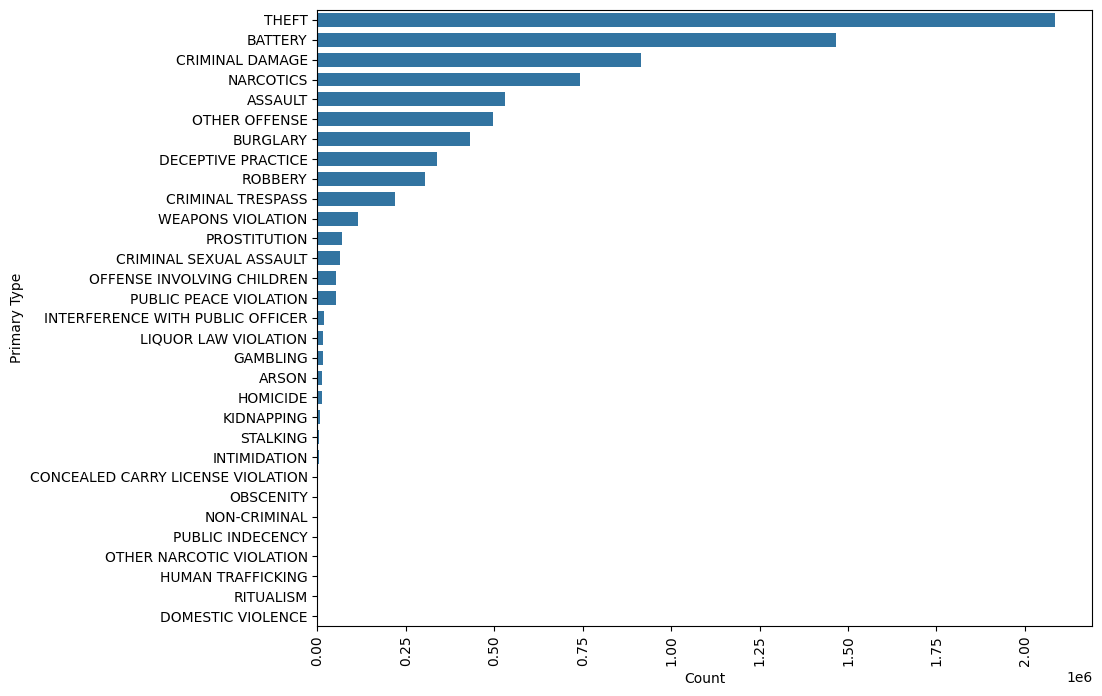

In [14]:


counts = df['Primary Type'].value_counts().reset_index()
# counts
counts.columns = ['Primary Type', 'Count']
# counts.columns

# Create a bar plot using seaborn
fig, ax = plt.subplots(figsize=(10,8))
# sns.barplot(data=counts, x='Primary Type', y='Count', hue="Primary Type", legend= "auto",  width = 0.7, ax=ax)
sns.barplot(data=counts, x='Count', y='Primary Type', ax=ax, orient='h', width=0.7)

# Rotate x labels if necessary for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

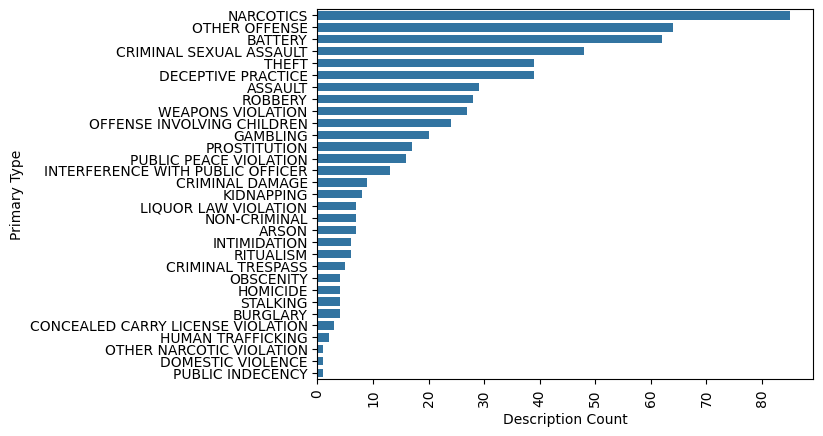

In [15]:
unique_type = df.groupby('Primary Type')['Description'].nunique().reset_index()


unique_type.columns = ['Primary Type', 'Description Count']
# counts.columns

unique_type = unique_type.sort_values(by='Description Count',ascending=False)

# Create a bar plot using seaborn
fig, ax = plt.subplots()
# sns.barplot(data=counts, x='Primary Type', y='Count', hue="Primary Type", legend= "auto",  width = 0.7, ax=ax)
sns.barplot(data=unique_type, x='Description Count', y='Primary Type', orient= 'h', ax=ax, width=0.7)

# Rotate x labels if necessary for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

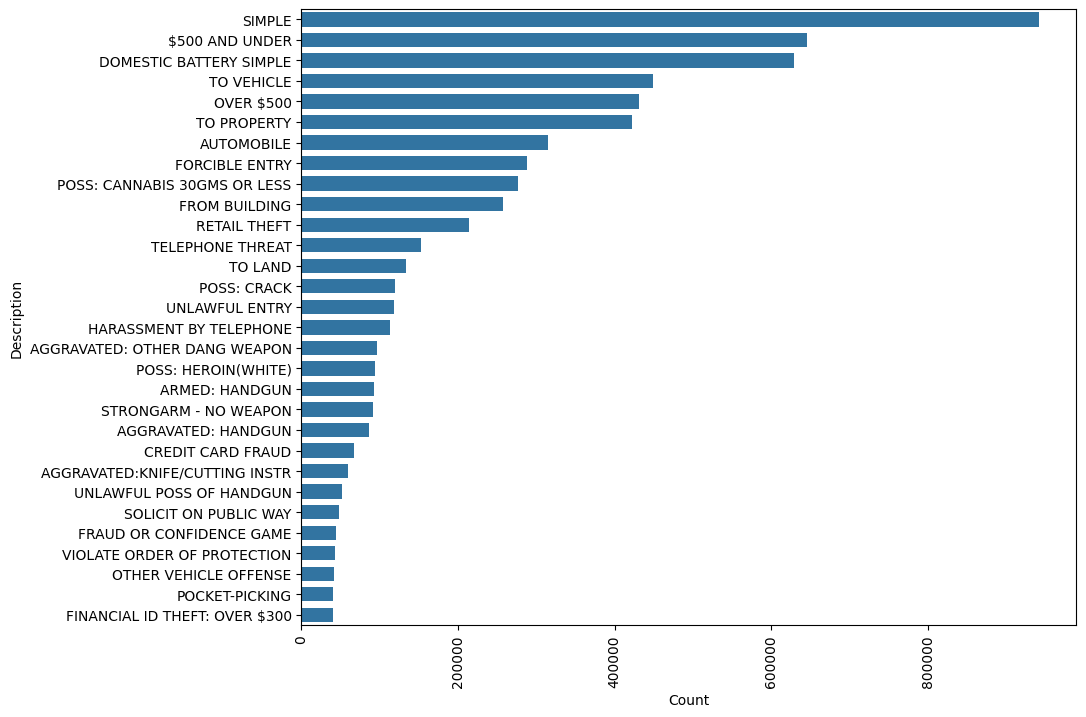

In [16]:
counts_desc = df['Description'].value_counts().reset_index()
# counts
counts_desc.columns = ['Description', 'Count']
# counts.columns

# top 30
top_desc=counts_desc.head(30)

# Create a bar plot using seaborn
fig, ax = plt.subplots(figsize=(10,8))
# sns.barplot(data=counts, x='Primary Type', y='Count', hue="Primary Type", legend= "auto",  width = 0.7, ax=ax)
sns.barplot(data=top_desc, x='Count', y='Description', ax=ax, orient='h', width=0.7)

# Rotate x labels if necessary for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

Since Description is sub division of crime type and of more than 500 unique values, Primary Type will be analysed in detail.

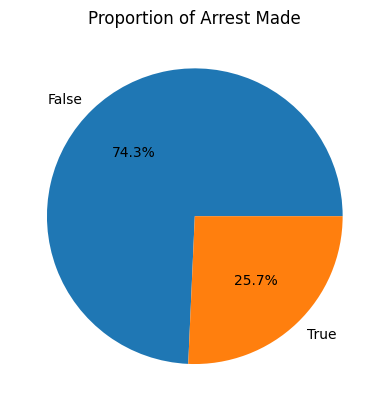

In [17]:
arrest_count=df['Arrest'].value_counts()
# print(arrest_count)
plt.pie(arrest_count, labels=arrest_count.index, autopct='%1.1f%%')
plt.title('Proportion of Arrest Made')
plt.show()

C:\Users\Good Day\AppData\Local\Temp\ipykernel_1200\4005025255.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_arrest_data, x='arrest_ratio', y= 'Primary Type', ax=ax, palette='viridis')


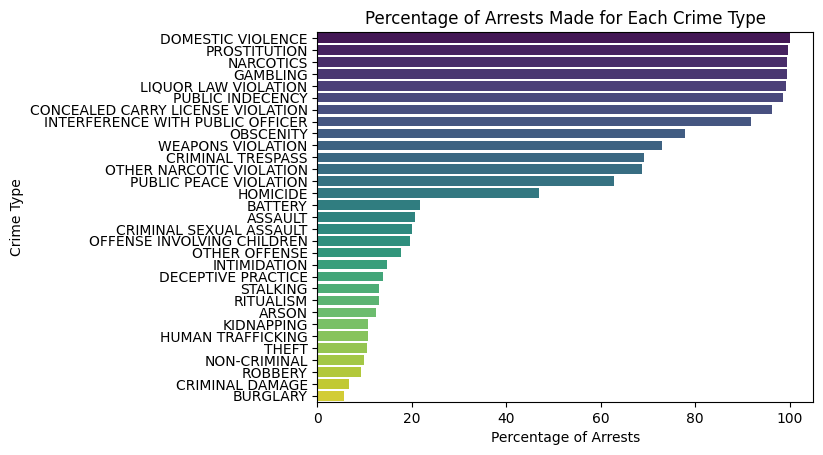

In [18]:
total_crime_count= df['Primary Type'].value_counts().reset_index()
total_crime_count.columns= ['Primary Type', 'Total Counts']

# filter df for arrested rows
arrest_df= df[df['Arrest']==True]

arrest_crime = arrest_df['Primary Type'].value_counts().reset_index()
arrest_crime.columns = ['Primary Type', 'Arrest Count']

# merge 2 dataframe on primary type
crime_arrest_data=pd.merge(total_crime_count, arrest_crime, on='Primary Type', how='left')
# crime_arrest_data

crime_arrest_data['arrest_ratio']=(crime_arrest_data['Arrest Count']/crime_arrest_data['Total Counts'])*100

# Sort the DataFrame by arrest ratio in descending order
crime_arrest_data = crime_arrest_data.sort_values(by='arrest_ratio', ascending=False)

fig, ax = plt.subplots()
sns.barplot(data=crime_arrest_data, x='arrest_ratio', y= 'Primary Type', ax=ax, palette='viridis')
plt.title('Percentage of Arrests Made for Each Crime Type')
plt.xlabel('Percentage of Arrests')
plt.ylabel('Crime Type')
plt.show()

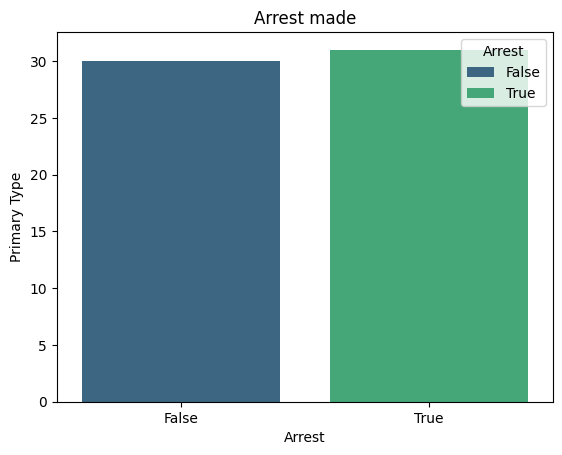

In [19]:
arrest=df.groupby('Arrest')['Primary Type'].nunique().reset_index()
arrest.columns= ['Arrest', 'Primary Type']

fig, ax = plt.subplots()
sns.barplot(data=arrest, x= 'Arrest', y='Primary Type', hue= 'Arrest', palette='viridis', ax=ax)
plt.title('Arrest made')
plt.show()


All crime type has been arrested, so there is no specific relation to crime type.

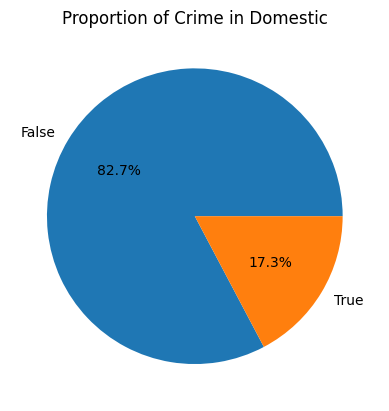

In [20]:
domestic_count=df['Domestic'].value_counts()
# print(arrest_count)
plt.pie(domestic_count, labels=domestic_count.index, autopct='%1.1f%%')
plt.title('Proportion of Crime in Domestic')
plt.show()

Most of the crime happened in non domestic area. So Domestic field to be considered for crime prediction.

C:\Users\Good Day\AppData\Local\Temp\ipykernel_1200\989684077.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= location_crime, x= 'count', y='Location Description', ax=ax, palette='viridis', width=0.7)


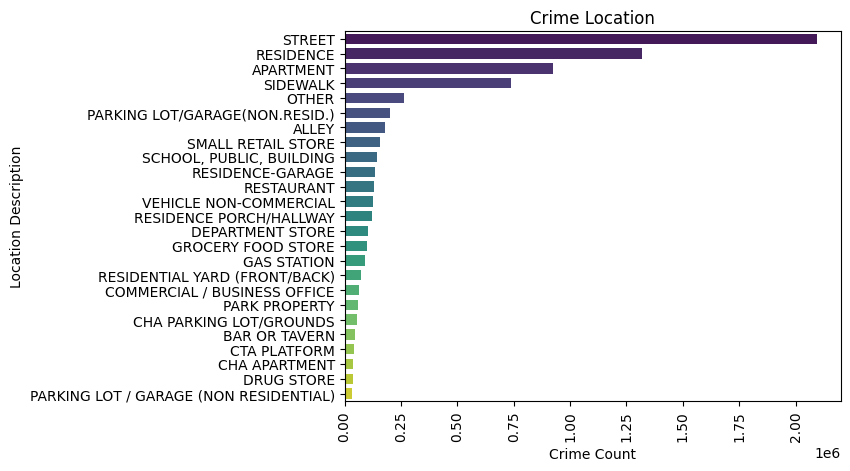

In [21]:
location_crime=df['Location Description'].value_counts().reset_index()
# top 25
location_crime = location_crime.head(25)
location_crime.columns= ['Location Description', 'count']
fig, ax =plt.subplots()
sns.barplot(data= location_crime, x= 'count', y='Location Description', ax=ax, palette='viridis', width=0.7)
plt.title('Crime Location')
plt.xticks(rotation=90)
plt.xlabel('Crime Count')
plt.ylabel('Location Description')
plt.show()


Location is major factor for crime activity, location is considered for crime prediction.

In [22]:
df['Beat'].value_counts().reset_index()

,Beat,count
0,421,62259
1,423,61551
2,1834,57960
3,624,56323
4,511,54662
...,...,...
300,1652,1432
301,1655,1419
302,1650,136
303,430,17


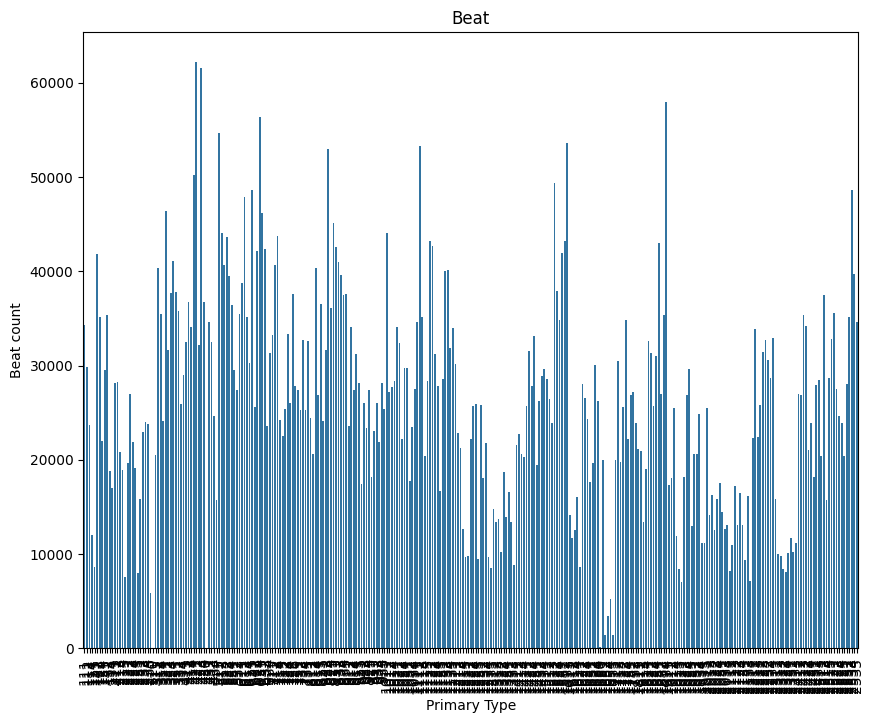

In [23]:
beat=df['Beat'].value_counts().reset_index()
beat.columns=['Primary Type', 'Beat count']
# print(beat)



# Create a bar plot using seaborn
fig, ax = plt.subplots(figsize=(10,8))
# sns.barplot(data=counts, x='Primary Type', y='Count', hue="Primary Type", legend= "auto",  width = 0.7, ax=ax)
sns.barplot(data=beat, x='Primary Type', y='Beat count', ax=ax, width=0.7)

# Rotate x labels if necessary for better readability
plt.xticks(rotation=90)
plt.title('Beat')
plt.xlabel('Primary Type')
plt.ylabel('Beat count')

# Show the plot
plt.show()



All Beat unique value has wide spread of crime, so Beat is considered for crime prediction

In [24]:
df['District'].unique()

array([25., 17., 19.,  6.,  1., 12.,  3.,  8.,  7., 22.,  9., 11.,  4.,
       16., 14.,  5.,  2., 10., 20., 18., 15., 24., 31., 21.])

C:\Users\Good Day\AppData\Local\Temp\ipykernel_1200\3217620756.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district, x='count', y='District', ax=ax, orient= 'h', palette= 'viridis', width=0.7)


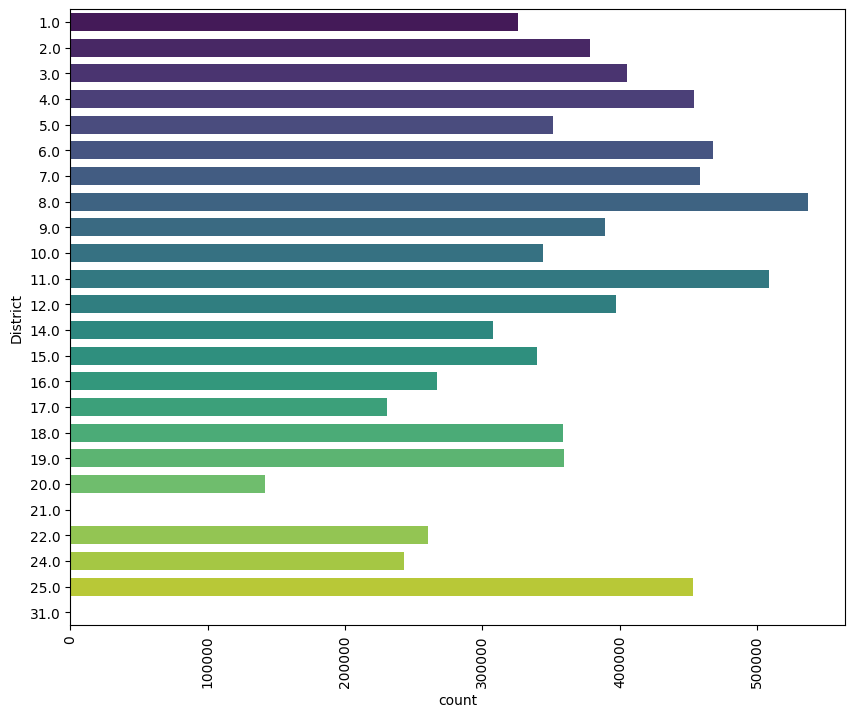

In [25]:
district=df['District'].value_counts().reset_index()
district.columns=['District', 'count']

# Create a bar plot using seaborn
fig, ax = plt.subplots(figsize=(10,8))
# sns.barplot(data=counts, x='Primary Type', y='Count', hue="Primary Type", legend= "auto",  width = 0.7, ax=ax)
sns.barplot(data=district, x='count', y='District', ax=ax, orient= 'h', palette= 'viridis', width=0.7)

# Rotate x labels if necessary for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()



Crime count is fluctuating in each and every district, so district is considered for crime prediction.

In [26]:
df['Ward'].nunique()

50

C:\Users\Good Day\AppData\Local\Temp\ipykernel_1200\1503067084.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ward, x= 'Ward', y= 'count', ax=ax, palette= 'viridis', width=0.75)


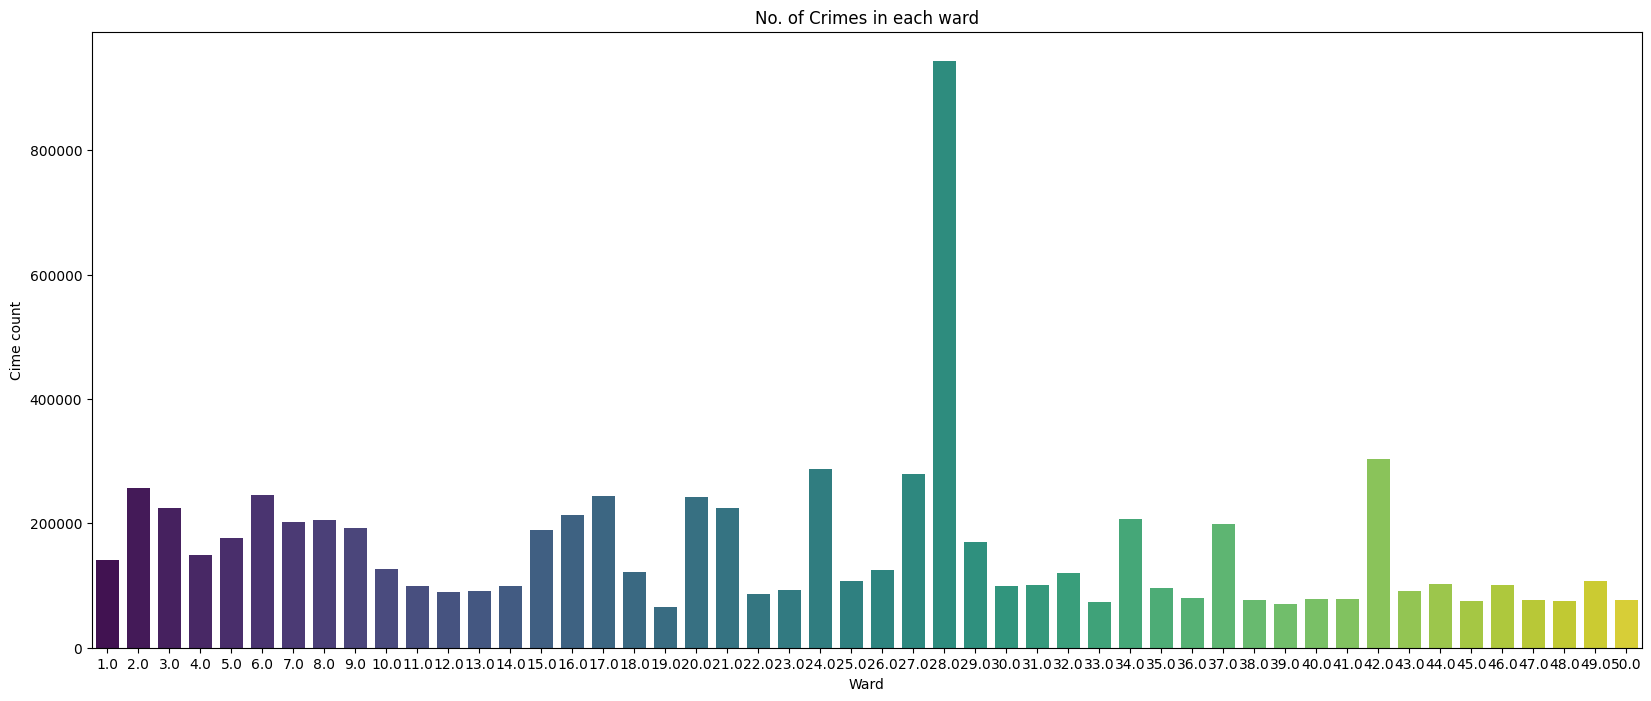

In [27]:
# Crime pattern in ward

ward=df['Ward'].value_counts().reset_index()
ward.columns=['Ward', 'count']

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=ward, x= 'Ward', y= 'count', ax=ax, palette= 'viridis', width=0.75)
plt.title('No. of Crimes in each ward')
plt.xlabel('Ward')
plt.ylabel('Cime count')
plt.show()

Crime count is fluctuating in each and every ward, so ward is considered for crime prediction.

In [28]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Time', 'Month', 'Day', 'Hour', 'Minute', 'Second'],
      dtype='object')

In [29]:
df['Community Area'].nunique()

78

C:\Users\Good Day\AppData\Local\Temp\ipykernel_1200\4145977567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=community, x= 'Community', y= 'count', ax=ax, palette= 'viridis', width=0.75)


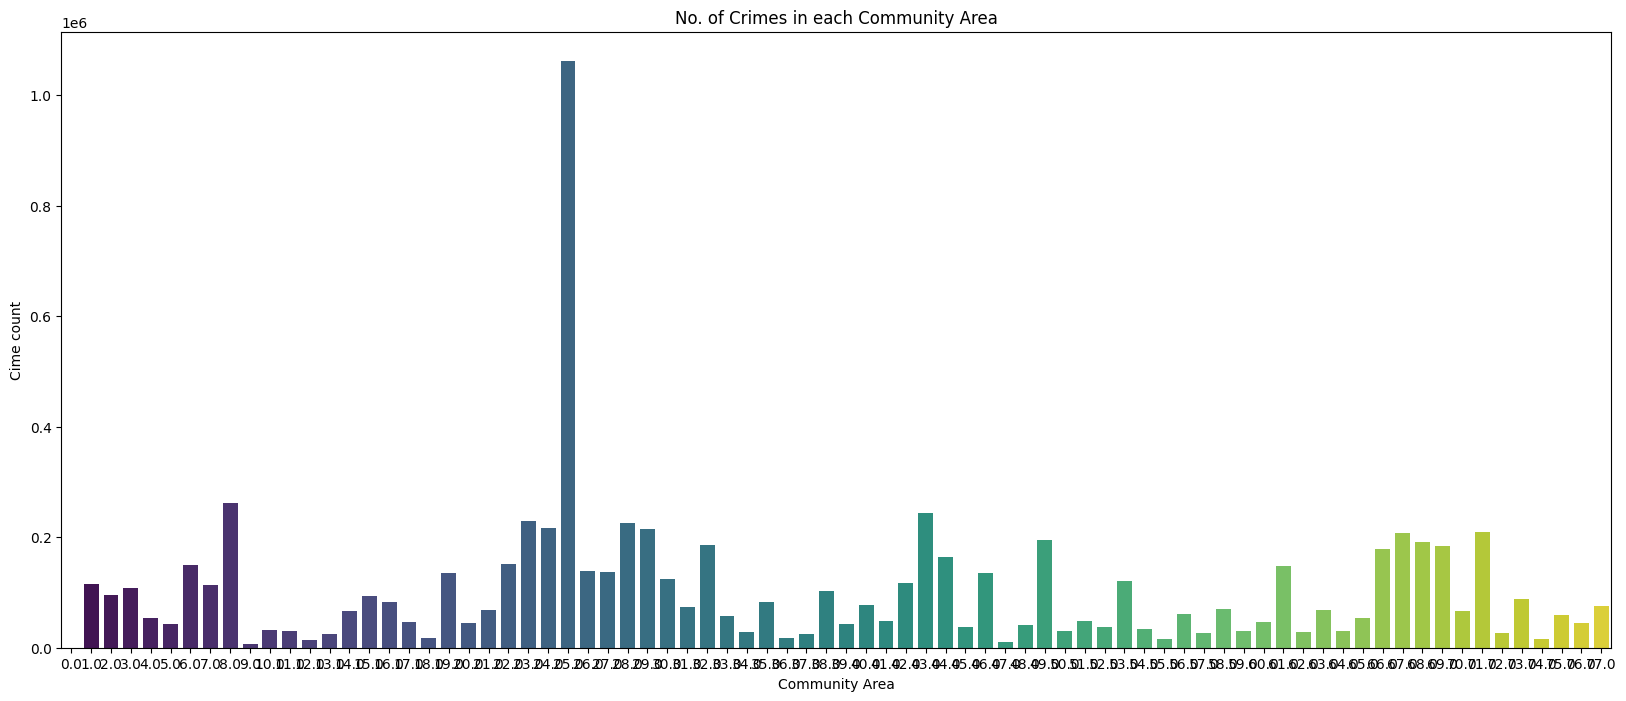

In [30]:
# Crime pattern in community area

community=df['Community Area'].value_counts().reset_index()
community.columns=['Community', 'count']

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=community, x= 'Community', y= 'count', ax=ax, palette= 'viridis', width=0.75)
plt.title('No. of Crimes in each Community Area')
plt.xlabel('Community Area')
plt.ylabel('Cime count')
plt.show()

Crime count is fluctuating in each and every Community area, so it is considered for crime prediction.

C:\Users\Good Day\AppData\Local\Temp\ipykernel_1200\3615947475.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fbi, x= 'FBI_Code', y= 'count', ax=ax, palette= 'viridis', width=0.75)


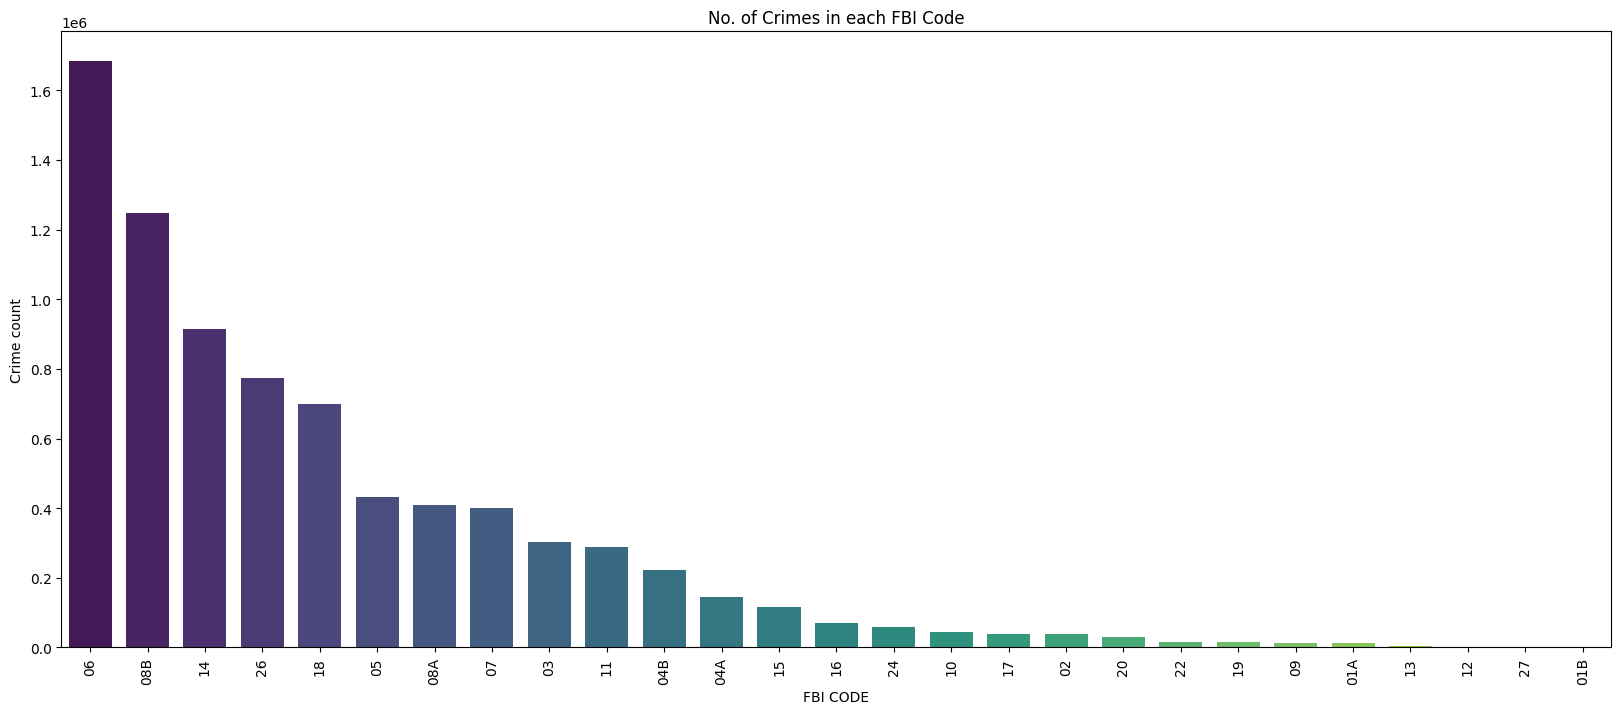

In [31]:
# fbi=df.groupby('FBI Code')['Primary Type'].agg(lambda x:x.nunique())
fbi=df['FBI Code'].value_counts().reset_index()
fbi.columns=['FBI_Code', 'count']

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=fbi, x= 'FBI_Code', y= 'count', ax=ax, palette= 'viridis', width=0.75)
plt.title('No. of Crimes in each FBI Code')
plt.xlabel('FBI CODE')
plt.ylabel('Crime count')
plt.xticks(rotation=90)
plt.show()

C:\Users\Good Day\AppData\Local\Temp\ipykernel_1200\4112421015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=FBI, x= 'FBI_Code', y= 'Primary_count', ax=ax, palette= 'viridis', width=0.75)


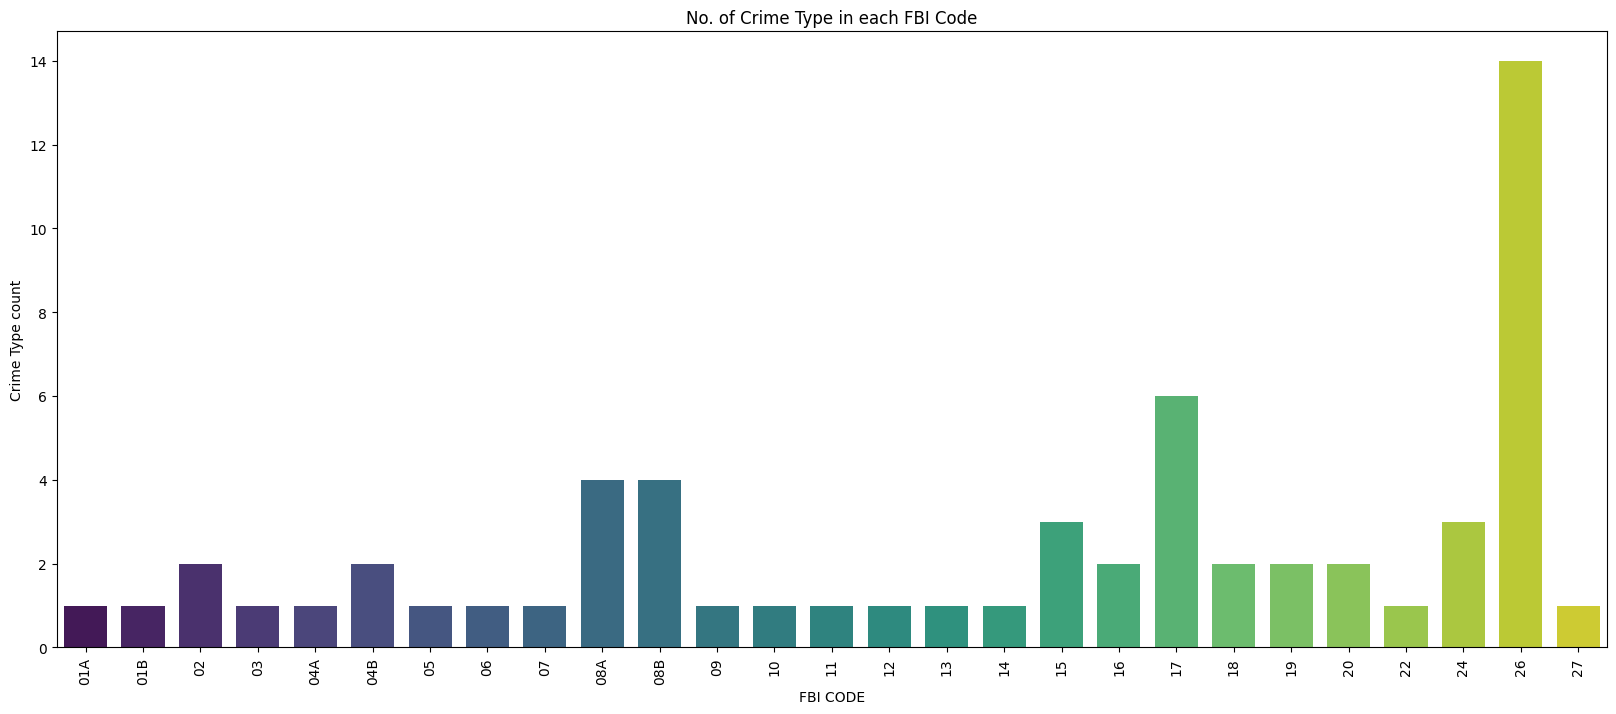

In [32]:
FBI=df.groupby('FBI Code')['Primary Type'].nunique().reset_index()
FBI.columns=['FBI_Code', 'Primary_count']

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=FBI, x= 'FBI_Code', y= 'Primary_count', ax=ax, palette= 'viridis', width=0.75)
plt.title('No. of Crime Type in each FBI Code')
plt.xlabel('FBI CODE')
plt.ylabel('Crime Type count')
plt.xticks(rotation=90)
plt.show()


Most of the FBI codes holds 1 to 2 Crime type and highest no of crimes FBI code holds single Crime type. So it will not make any sense in crime prediction.

In [33]:
df['X Coordinate'].nunique()

79150

In [34]:
df['Y Coordinate'].nunique()

130292

In [35]:
df['Latitude'].nunique()

897871

In [36]:
df['Longitude'].nunique()

897273

In [37]:
df['Location'].nunique()

899151

Above 5 columns corresponding to Location and unique location is huge, so it will not helpful in crime prediction.

    Year   count
0   2001  482854
1   2003  472005
2   2002  471507
3   2004  467193
4   2005  449919
5   2006  445540
6   2007  435685
7   2008  419833
8   2009  385944
9   2010  369950
10  2011  351064
11  2012  335117
12  2013  306354
13  2014  273631
14  2016  266453
15  2017  264113
16  2018  262890
17  2023  260316
18  2019  258169
19  2015  257767
20  2022  234214
21  2020  206906
22  2021  202007
23  2024   99802


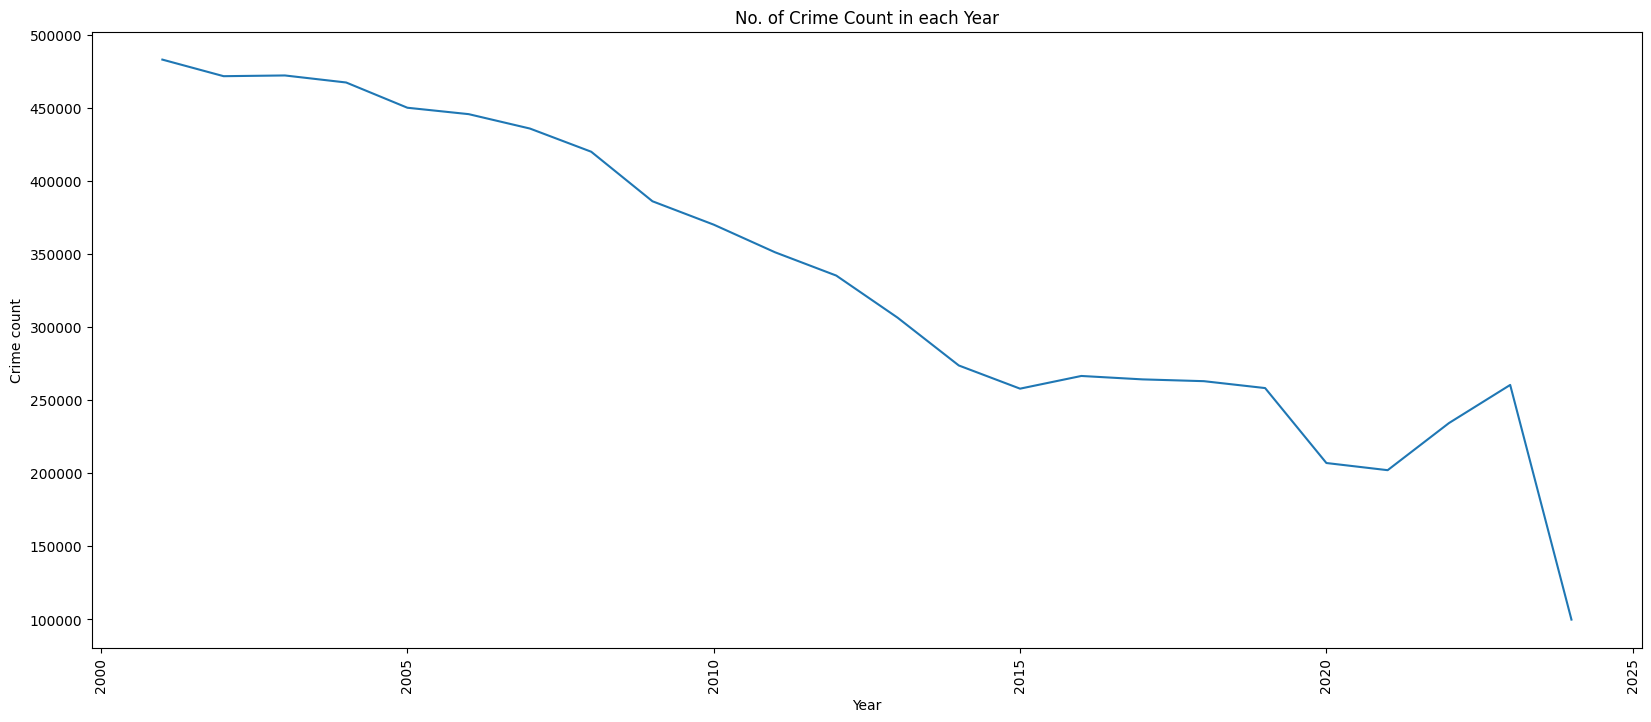

In [38]:
# Crime rate over period of years

year=df['Year'].value_counts().reset_index()
year.columns= ['Year', 'count']
print(year)

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=year, x= 'Year', y= 'count', ax=ax)
plt.title('No. of Crime Count in each Year')
plt.xlabel('Year')
plt.ylabel('Crime count')
plt.xticks(rotation=90)
plt.show()

Crime rate is in reducing trend, so year column to be considered to train the model to predict crime.

    Month   count
0       7  733671
1       8  726465
2       5  719539
3       6  696991
4      10  689955
5       9  683202
6       3  663740
7       4  660723
8       1  630957
9      11  621713
10     12  591762
11      2  560515


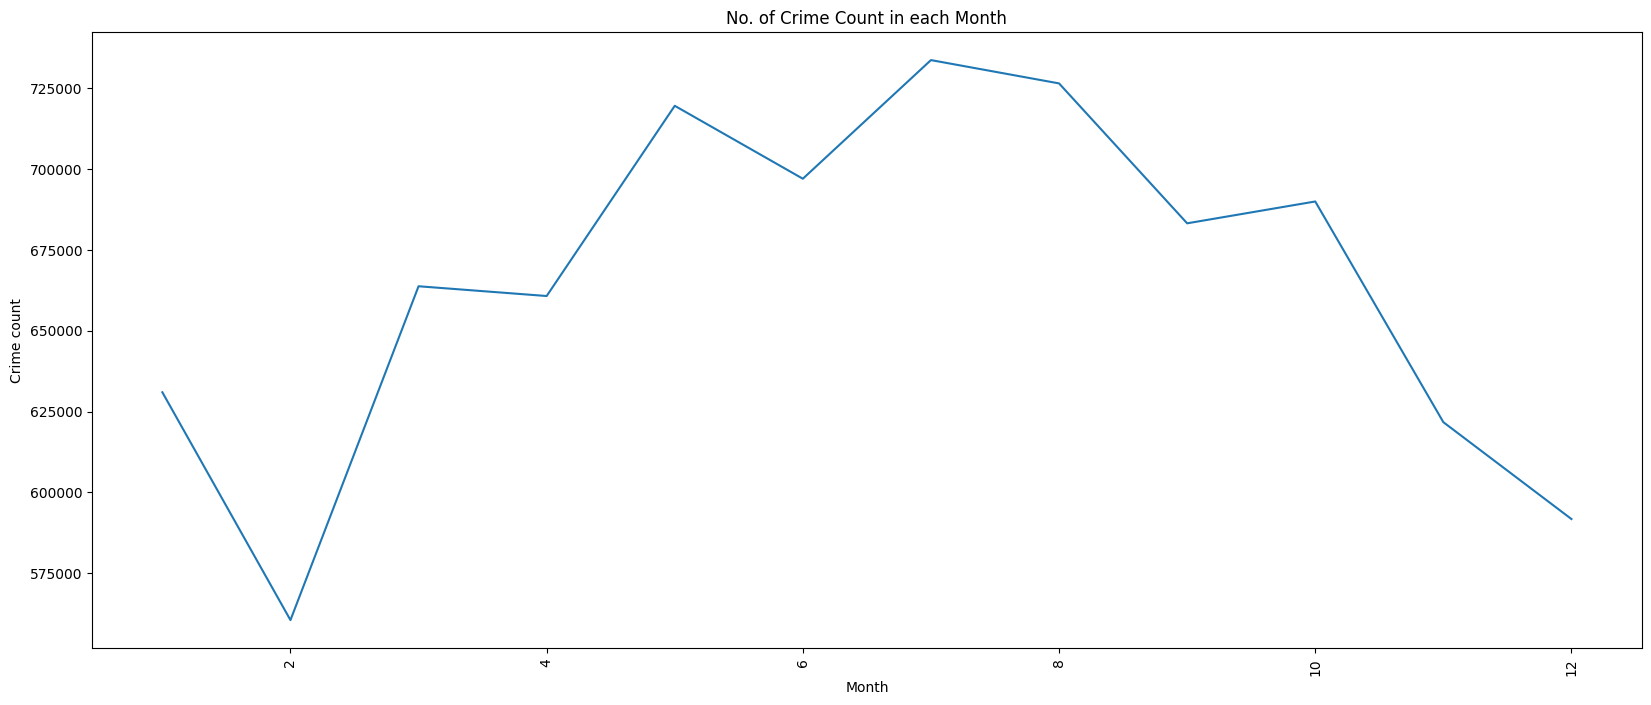

In [39]:
# Crime rate over period of Months for overall years

month=df['Month'].value_counts().reset_index()
month.columns= ['Month', 'count']
print(month)

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=month, x= 'Month', y= 'count', ax=ax)
plt.title('No. of Crime Count in each Month')
plt.xlabel('Month')
plt.ylabel('Crime count')
plt.xticks(rotation=90)
plt.show()

    Month  count
0       8  23985
1       7  23819
2      10  22891
3       6  22555
4       9  22440
5       5  22045
6      11  21199
7      12  21067
8       1  20921
9       3  20571
10      4  20559
11      2  18264


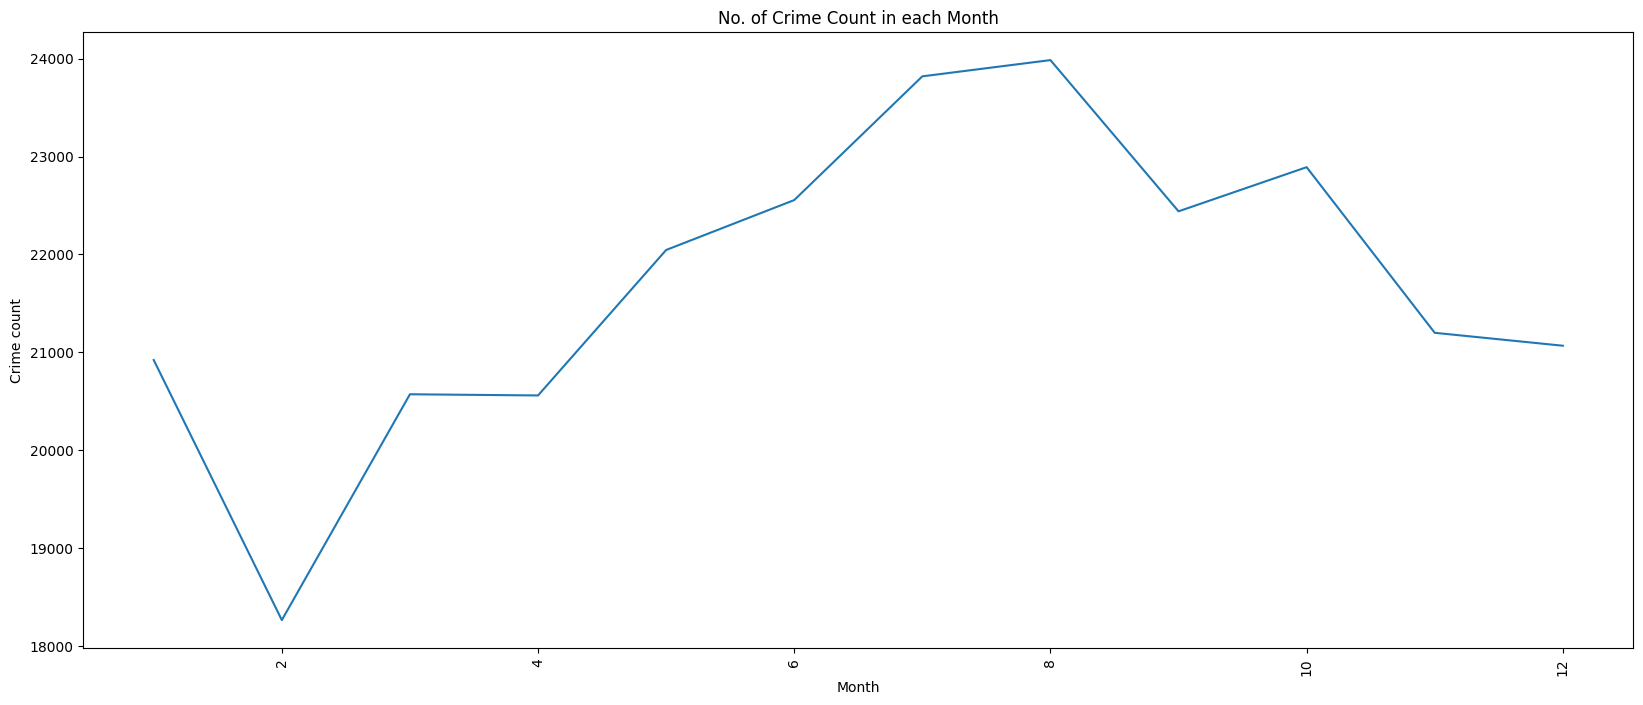

In [40]:
# Crime rate over period of Months for year 2023

# filter data for the year 2023
df_month=df[df['Year']==2023]
month=df_month['Month'].value_counts().reset_index()
month.columns= ['Month', 'count']
print(month)

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=month, x= 'Month', y= 'count', ax=ax)
plt.title('No. of Crime Count in each Month')
plt.xlabel('Month')
plt.ylabel('Crime count')
plt.xticks(rotation=90)
plt.show()

Crime rate ranges from 18k to 24k each month, so there is no specific crime rate to month.

    Day  count
0     1   9933
1     4   8797
2    15   8797
3     3   8765
4    17   8698
5    20   8684
6     5   8632
7    26   8586
8    10   8565
9    18   8564
10    2   8540
11    7   8538
12   25   8534
13   24   8522
14   16   8506
15   28   8497
16    6   8495
17   19   8472
18   23   8469
19   14   8467
20    9   8463
21   22   8413
22   27   8405
23   21   8391
24   13   8388
25   11   8382
26    8   8314
27   12   8221
28   30   7802
29   29   7640
30   31   4836


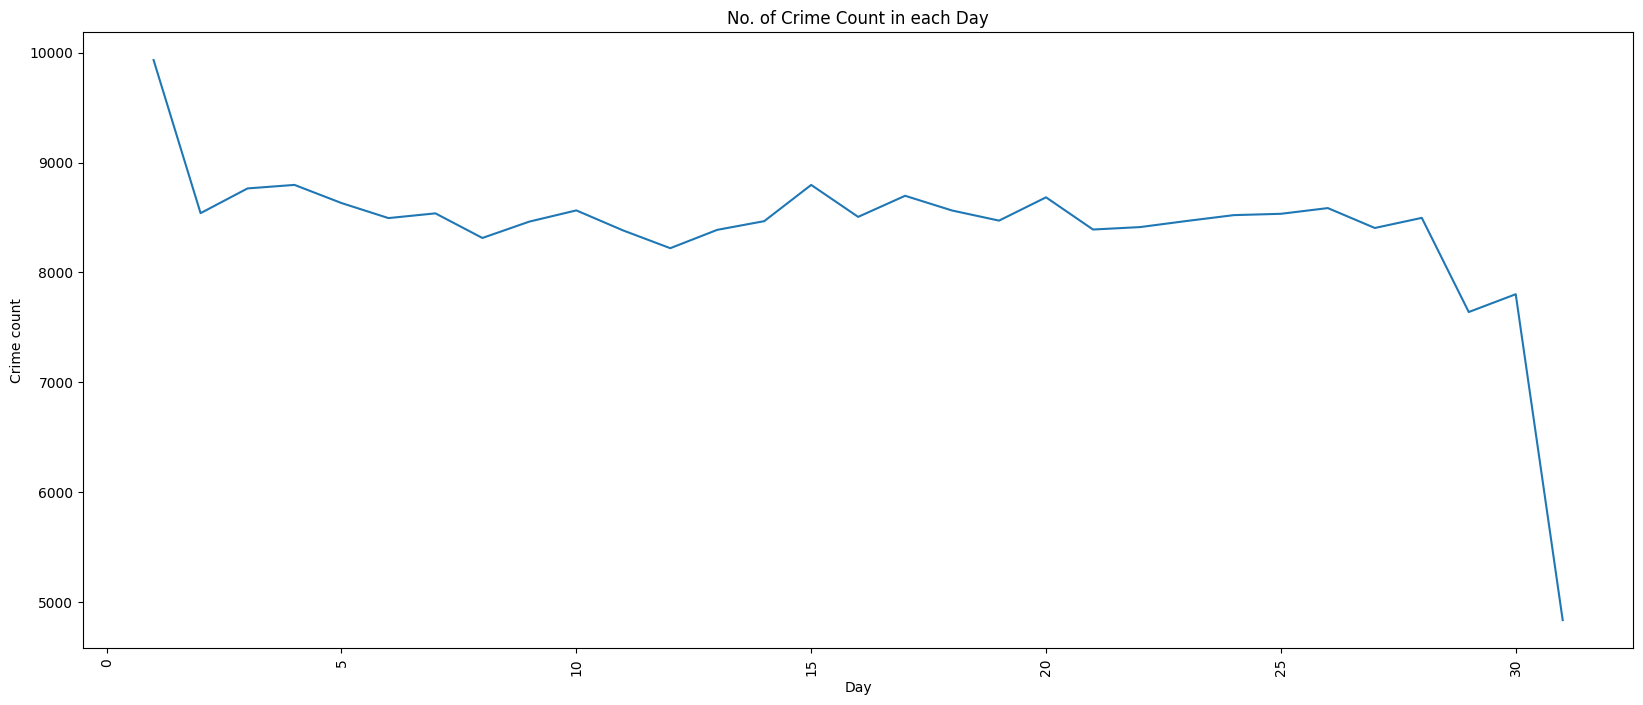

In [41]:
# Crime rate over Date wise for year 2023

# filter data for the year 2023
df_date=df[df['Year']==2023]
month=df_date['Day'].value_counts().reset_index()
month.columns= ['Day', 'count']
print(month)

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=month, x= 'Day', y= 'count', ax=ax)
plt.title('No. of Crime Count in each Day')
plt.xlabel('Day')
plt.ylabel('Crime count')
plt.xticks(rotation=90)
plt.show()

Crime rate is high at starting of month and uniform throughout the month and minimum at month ends. Date is important factor for crime prediction. 

    Hour  count
0      0  18500
1     12  14504
2     15  14270
3     17  14050
4     18  14036
5     16  13887
6     19  13402
7     20  13007
8     14  12254
9     21  12038
10    22  11660
11    13  11471
12    11  11165
13    10  10858
14    23  10813
15     9  10659
16     1   8850
17     8   8737
18     2   7724
19     3   6595
20     7   6515
21     4   5399
22     6   5056
23     5   4866


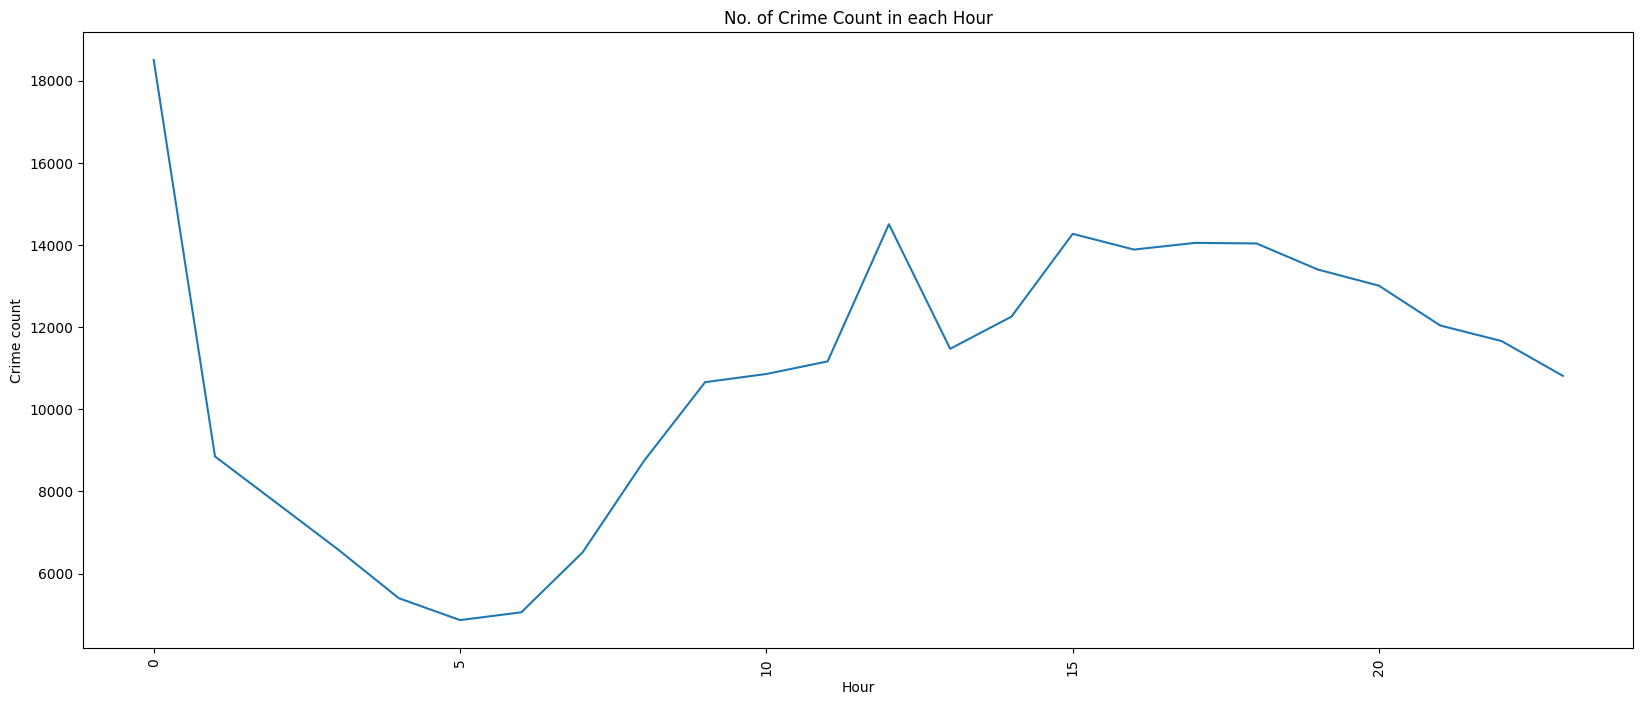

In [42]:
# Crime rate over Hour wise for year 2023

# filter data for the year 2023
df_date=df[df['Year']==2023]
hour=df_date['Hour'].value_counts().reset_index()
hour.columns= ['Hour', 'count']
print(hour)

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=hour, x= 'Hour', y= 'count', ax=ax)
plt.title('No. of Crime Count in each Hour')
plt.xlabel('Hour')
plt.ylabel('Crime count')
plt.xticks(rotation=90)
plt.show()

Most of the crimes being happened from morning 9AM to midninght 12AM. 

In [43]:
# Filtering the data for last 5 years to train the predictive model

data=df[df['Year'].isin([2020,2021,2022,2023,2024])]
data.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Time,Month,Day,Hour,Minute,Second
0,25953,JE240540,2021-05-24,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",15:06:00,5,24,15,6,0
1,26038,JE279849,2021-06-26,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",09:24:00,6,26,9,24,0


In [44]:
data.shape

(1003245, 28)

In [45]:
# Fixing the fetature which highly related to crime through analysed data.

le=LabelEncoder()
cols=['IUCR','Location Description', 'Domestic', 'Block', 'Primary Type', 'Description', 'Arrest', 'FBI Code']
features=data[cols]
label=features.apply(le.fit)

data[cols]=data[cols].apply(le.fit_transform)
data.head(2)
# Remove Unique ID's repeated column in data
data.drop(['ID', 'Case Number', 'Date', 'Updated On', 'Time', 'Minute', 'Second'], axis=1, inplace=True)

C:\Users\Good Day\AppData\Local\Temp\ipykernel_1200\3462829651.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols]=data[cols].apply(le.fit_transform)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Time,Month,Day,Hour,Minute,Second
0,25953,JE240540,2021-05-24,10440,0,10,188,161,1,0,...,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",15:06:00,5,24,15,6,0
1,26038,JE279849,2021-06-26,26434,0,10,188,124,1,0,...,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",09:24:00,6,26,9,24,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003245 entries, 0 to 7979232
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Block                 1003245 non-null  int64  
 1   IUCR                  1003245 non-null  int64  
 2   Primary Type          1003245 non-null  int64  
 3   Description           1003245 non-null  int64  
 4   Location Description  1003245 non-null  int64  
 5   Arrest                1003245 non-null  int64  
 6   Domestic              1003245 non-null  int64  
 7   Beat                  1003245 non-null  int64  
 8   District              1003245 non-null  float64
 9   Ward                  1003245 non-null  float64
 10  Community Area        1003245 non-null  float64
 11  FBI Code              1003245 non-null  int64  
 12  X Coordinate          1003245 non-null  float64
 13  Y Coordinate          1003245 non-null  float64
 14  Year                  1003245 non-null 

In [48]:
# Taking features for build model to find features score

x=data[['IUCR','Block', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'Year', 'Month', 'Day', 'Hour', 'Latitude', 'Longitude']]
y=data['Primary Type']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [49]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((802596, 13), (200649, 13), (802596,), (200649,))

In [50]:
print(f'Block: {data['Block'].skew()}')
print(f'Domestic: {data['Domestic'].skew()}')
print(f'Beat: {data['Beat'].skew()}')
print(f'Community Arae: {data['Community Area'].skew()}')
print(f'Ward: {data['Ward'].skew()}')
print(f'Year: {data['Year'].skew()}')
print(f'Month: {data['Month'].skew()}')
print(f'Date: {data['Day'].skew()}')
print(f'Time: {data['Hour'].skew()}')

Block: -0.010803537040926008
Domestic: 1.4810531972494612
Beat: 0.39414096444226
Community Arae: 0.21066769997941598
Ward: 0.17337797561139906
Year: -0.008669623962787414
Month: 0.06873614776388155
Date: 0.01368500628385536
Time: -0.36712540694827966


In [51]:
predictor=RandomForestClassifier(n_estimators=100, max_depth=4)

In [57]:
model=predictor.fit(x_train,y_train)

In [58]:
feature_scores = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

IUCR              0.774773
Domestic          0.161638
Latitude          0.013294
Beat              0.009890
District          0.008249
Ward              0.007435
Longitude         0.006374
Hour              0.006153
Community Area    0.005645
Year              0.004861
Block             0.001598
Month             0.000075
Day               0.000014
dtype: float64

In [1]:
import pandas as pd
data_final=pd.read_csv(r'C:\Users\Lakshmi\Desktop\Chicago\crime_data1.csv')
data_final.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Time,Month,Day,Hour,Minute,Second
0,25953,JE240540,2021-05-24,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",15:06:00,5,24,15,6,0
1,26038,JE279849,2021-06-26,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",09:24:00,6,26,9,24,0


In [3]:
# Filter data for last 5 years
data=data_final[data_final['Year'].isin([2020,2021,2022, 2023, 2024])]
data.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Time,Month,Day,Hour,Minute,Second
0,25953,JE240540,2021-05-24,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",15:06:00,5,24,15,6,0
1,26038,JE279849,2021-06-26,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",09:24:00,6,26,9,24,0


In [19]:
data['Primary Type'].unique()

array(['BURGLARY', 'BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE',
       'CRIMINAL SEXUAL ASSAULT', 'THEFT', 'OFFENSE INVOLVING CHILDREN',
       'ROBBERY', 'ASSAULT', 'OTHER OFFENSE', 'WEAPONS VIOLATION',
       'STALKING', 'CRIMINAL TRESPASS', 'PROSTITUTION', 'ARSON',
       'NARCOTICS', 'KIDNAPPING', 'CONCEALED CARRY LICENSE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
       'HOMICIDE', 'OBSCENITY', 'LIQUOR LAW VIOLATION', 'INTIMIDATION',
       'GAMBLING', 'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL', 'PUBLIC INDECENCY'], dtype=object)

In [4]:
# Filter data for most 5 priority crime.
data_1=data[data['Primary Type'].isin(['CRIMINAL SEXUAL ASSAULT','THEFT','KIDNAPPING','HOMICIDE','NARCOTICS'])]
data_1.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Time,Month,Day,Hour,Minute,Second
0,25953,JE240540,2021-05-24,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",15:06:00,5,24,15,6,0
1,26038,JE279849,2021-06-26,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",09:24:00,6,26,9,24,0


In [5]:
data_1.shape

(329873, 28)

In [6]:
data_1.to_csv('filtered_crime.csv')

In [4]:
import pandas as pd
data_1=pd.read_csv(r'C:\Users\Lakshmi\Desktop\Chicago\filtered_crime.csv')
data_1.head(2)

C:\Users\Lakshmi\AppData\Local\Temp\ipykernel_9312\3710007936.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data_1=pd.read_csv(r'C:\Users\Lakshmi\Desktop\Chicago\filtered_crime.csv')


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Updated On,Latitude,Longitude,Location,Time,Month,Day,Hour,Minute,Second
0,0,25953,JE240540,2021-05-24,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",15:06:00,5,24,15,6,0
1,1,26038,JE279849,2021-06-26,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,...,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",09:24:00,6,26,9,24,0


In [5]:
# Taking the features from analysis
data_1.drop(['ID', 'Case Number', 'Date', 'IUCR', 'Description', 'Arrest', 'Updated On', 'Latitude', 'Longitude', 'Location', 'Time', 'Minute', 'Second',
                 'FBI Code', 'Y Coordinate', 'X Coordinate'], axis=1, inplace=True)

In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329873 entries, 0 to 329872
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            329873 non-null  int64  
 1   Block                 329873 non-null  object 
 2   Primary Type          329873 non-null  object 
 3   Location Description  329873 non-null  object 
 4   Domestic              329873 non-null  bool   
 5   Beat                  329873 non-null  int64  
 6   District              329873 non-null  float64
 7   Ward                  329873 non-null  float64
 8   Community Area        329873 non-null  float64
 9   Year                  329873 non-null  int64  
 10  Month                 329873 non-null  int64  
 11  Day                   329873 non-null  int64  
 12  Hour                  329873 non-null  int64  
dtypes: bool(1), float64(3), int64(6), object(3)
memory usage: 30.5+ MB


In [49]:
data=data_1.copy()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329873 entries, 0 to 329872
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            329873 non-null  int64  
 1   Block                 329873 non-null  object 
 2   Primary Type          329873 non-null  object 
 3   Location Description  329873 non-null  object 
 4   Domestic              329873 non-null  bool   
 5   Beat                  329873 non-null  int64  
 6   District              329873 non-null  float64
 7   Ward                  329873 non-null  float64
 8   Community Area        329873 non-null  float64
 9   Year                  329873 non-null  int64  
 10  Month                 329873 non-null  int64  
 11  Day                   329873 non-null  int64  
 12  Hour                  329873 non-null  int64  
dtypes: bool(1), float64(3), int64(6), object(3)
memory usage: 30.5+ MB


In [52]:
data['Block'] = data['Block'].astype(str)
data['Primary Type'] = data['Primary Type'].astype(str)
data['Location Description'] = data['Location Description'].astype(str)


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329873 entries, 0 to 329872
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            329873 non-null  int64  
 1   Block                 329873 non-null  object 
 2   Primary Type          329873 non-null  object 
 3   Location Description  329873 non-null  object 
 4   Domestic              329873 non-null  bool   
 5   Beat                  329873 non-null  int64  
 6   District              329873 non-null  float64
 7   Ward                  329873 non-null  float64
 8   Community Area        329873 non-null  float64
 9   Year                  329873 non-null  int64  
 10  Month                 329873 non-null  int64  
 11  Day                   329873 non-null  int64  
 12  Hour                  329873 non-null  int64  
dtypes: bool(1), float64(3), int64(6), object(3)
memory usage: 30.5+ MB


In [30]:
print(data.dtypes)


Unnamed: 0                int64
Block                    object
Primary Type             object
Location Description     object
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
Year                      int64
Month                     int64
Day                       int64
Hour                      int64
dtype: object


In [54]:
# Label encode categorical value
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder
le=LabelEncoder()
block_encode=le.fit(data['Block'])

data['Block']=le.transform(data['Block'])
data.head(2)

# oe=OrdinalEncoder()
# block_encode=oe.fit(data['Block'])

# data['Block']=oe.transform(data['Block'])
# data.head(2)

,Unnamed: 0,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community Area,Year,Month,Day,Hour
0,0,9361,HOMICIDE,STREET,False,2515,25.0,36.0,19.0,2021,5,24,15
1,1,23662,HOMICIDE,PARKING LOT,False,1711,17.0,50.0,13.0,2021,6,26,9


In [55]:
import pickle
with open('encoder_1.pkl', 'wb') as file:
    pickle.dump(block_encode,file)

In [56]:
import pickle
with open(r'C:\Users\Lakshmi\Desktop\Chicago\encoder_1.pkl', 'rb') as file:
    encoder_block=pickle.load(file)

In [57]:
encoder_block.transform(['020XX N LARAMIE AVE'])

array([9361])

In [58]:
encoder_block.classes_

array(['0000X E 100TH PL', '0000X E 100TH ST', '0000X E 101ST PL', ...,
       '137XX S DOTY AVE W', '137XX S INDIANA AVE', '137XX S LEYDEN AVE'],
      dtype=object)

In [59]:


loc_encode=le.fit(data['Location Description'])

data['Location Description']=le.transform(data['Location Description'])
data.head(2)

,Unnamed: 0,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community Area,Year,Month,Day,Hour
0,0,9361,HOMICIDE,160,False,2515,25.0,36.0,19.0,2021,5,24,15
1,1,23662,HOMICIDE,123,False,1711,17.0,50.0,13.0,2021,6,26,9


In [60]:
with open('encoder_2.pkl', 'wb') as file:
    pickle.dump(loc_encode,file)

In [61]:
loc_encode.classes_

array(['ABANDONED BUILDING', 'AIRCRAFT',
       'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA',
       'AIRPORT BUILDING NON-TERMINAL - SECURE AREA',
       'AIRPORT EXTERIOR - NON-SECURE AREA',
       'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT PARKING LOT',
       'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA',
       'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
       'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA',
       'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA',
       'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA',
       'AIRPORT TRANSPORTATION SYSTEM (ATS)',
       'AIRPORT VENDING ESTABLISHMENT', 'AIRPORT/AIRCRAFT', 'ALLEY',
       'ANIMAL HOSPITAL', 'APARTMENT', 'APPLIANCE STORE', 'ATHLETIC CLUB',
       'ATM (AUTOMATIC TELLER MACHINE)', 'AUTO',
       'AUTO / BOAT / RV DEALERSHIP', 'BANK', 'BANQUET HALL',
       'BAR OR TAVERN', 'BARBER SHOP/BEAUTY SALON', 'BARBERSHOP',
       'BASEMENT', 'BEACH', 'BOAT / WATERCRAFT', 'BOWLING ALLEY',
       'BRIDGE', 'CAR WASH', '

In [62]:
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
dom_encode=le.fit(data['Domestic'])

data['Domestic']=le.transform(data['Domestic'])
data.head(2)

,Unnamed: 0,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community Area,Year,Month,Day,Hour
0,0,9361,HOMICIDE,160,0,2515,25.0,36.0,19.0,2021,5,24,15
1,1,23662,HOMICIDE,123,0,1711,17.0,50.0,13.0,2021,6,26,9


In [63]:
with open('encoder_3.pkl', 'wb') as file:
    pickle.dump(dom_encode,file)

In [64]:
dom_encode.classes_

array([False,  True])

In [65]:
primary_encode=le.fit(data['Primary Type'])

data['Primary Type']=le.transform(data['Primary Type'])
data.head(2)

,Unnamed: 0,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community Area,Year,Month,Day,Hour
0,0,9361,1,160,0,2515,25.0,36.0,19.0,2021,5,24,15
1,1,23662,1,123,0,1711,17.0,50.0,13.0,2021,6,26,9


In [66]:
with open('encoder_4.pkl', 'wb') as file:
    pickle.dump(primary_encode,file)

In [67]:
primary_encode.classes_

array(['CRIMINAL SEXUAL ASSAULT', 'HOMICIDE', 'KIDNAPPING', 'NARCOTICS',
       'THEFT'], dtype=object)

In [69]:
primary_encode.transform(['HOMICIDE'])

array([1])

In [105]:
data.head(5)

,Unnamed: 0,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community Area,Year,Month,Day,Hour
0,0,9361,1,160,0,2515,25.0,36.0,19.0,2021,5,24,15
1,1,23662,1,123,0,1711,17.0,50.0,13.0,2021,6,26,9
2,6,25992,0,17,0,333,3.0,7.0,43.0,2023,7,24,21
3,7,14864,4,17,0,1732,17.0,30.0,21.0,2023,8,27,7
4,9,26624,4,136,0,835,8.0,18.0,70.0,2023,8,15,14


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329873 entries, 0 to 329872
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            329873 non-null  int64  
 1   Block                 329873 non-null  int64  
 2   Primary Type          329873 non-null  int64  
 3   Location Description  329873 non-null  int64  
 4   Domestic              329873 non-null  int64  
 5   Beat                  329873 non-null  int64  
 6   District              329873 non-null  float64
 7   Ward                  329873 non-null  float64
 8   Community Area        329873 non-null  float64
 9   Year                  329873 non-null  int64  
 10  Month                 329873 non-null  int64  
 11  Day                   329873 non-null  int64  
 12  Hour                  329873 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 32.7 MB


In [73]:
# Comparing feature scores with analysis - IUCR closely related to crime and loation also related. Since it is unique to crime type both columns to be removed.
from sklearn.model_selection import train_test_split

X=data[['Block','Location Description', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'Year', 'Month', 'Day', 'Hour']]
Y=data['Primary Type']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [74]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((263898, 11), (65975, 11), (263898,), (65975,))

In [75]:
X_train

,Block,Location Description,Domestic,Beat,District,Ward,Community Area,Year,Month,Day,Hour
931,6175,155,0,1433,14.0,1.0,24.0,2023,9,9,15
124618,21860,134,1,1522,15.0,29.0,25.0,2021,3,7,5
74476,13475,160,0,1931,19.0,32.0,5.0,2020,2,20,18
283901,1814,160,0,1533,15.0,29.0,25.0,2022,11,10,9
272105,16939,135,0,1723,17.0,35.0,16.0,2023,2,11,20
...,...,...,...,...,...,...,...,...,...,...,...
119879,25877,160,0,334,3.0,7.0,43.0,2020,5,15,5
259178,11799,57,0,1935,19.0,43.0,7.0,2022,10,7,21
131932,8124,160,0,1433,14.0,32.0,24.0,2020,11,3,19
146867,7412,17,0,1213,12.0,2.0,24.0,2020,11,24,10


In [76]:
Y_train

931       4
124618    4
74476     4
283901    4
272105    4
         ..
119879    4
259178    4
131932    4
146867    4
121958    4
Name: Primary Type, Length: 263898, dtype: int64

In [77]:
Y_train.unique()

array([4, 2, 0, 3, 1])

In [78]:
print(X.shape)
print(Y.shape)
Y[0]

(329873, 11)
(329873,)


np.int64(1)

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Checking the best classifier model to predict the Status.

def best_classifier_algorithm(algorithm):

    # Model building
    model=algorithm.fit(X_train, Y_train)

    # Predict for train and test accuracy

    Y_train_pred = model.predict(X_train)

    Y_test_pred  = model.predict(X_test)

    # Accuracy score

    training=accuracy_score(Y_train, Y_train_pred)
    testing=accuracy_score(Y_test, Y_test_pred)

    
    classifier={'Algorithm': model.__class__.__name__, 'Training score': training, 'Testing score': testing}

    return classifier

In [16]:
classifier_logistic = best_classifier_algorithm(LogisticRegression())
print(classifier_logistic)

c:\Users\Lakshmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Algorithm': 'LogisticRegression', 'Training score': 0.8856565794359942, 'Testing score': 0.8879878741947708}


In [17]:
classifier_random = best_classifier_algorithm(RandomForestClassifier())
print(classifier_random)
classifier_extra = best_classifier_algorithm(ExtraTreesClassifier())
print(classifier_extra)
classifier_gradient = best_classifier_algorithm(GradientBoostingClassifier())
print(classifier_gradient)


{'Algorithm': 'RandomForestClassifier', 'Training score': 0.9999014770858438, 'Testing score': 0.9091322470632816}
{'Algorithm': 'ExtraTreesClassifier', 'Training score': 0.9999166344572524, 'Testing score': 0.9054945054945055}
{'Algorithm': 'GradientBoostingClassifier', 'Training score': 0.9046108723825115, 'Testing score': 0.9067677150435771}


Upon finding accuracy of different algorithm found Gradient Boosting clasifier performs well i both training and testing. whereas Random forest and Extratree algorithm overfitting.

In [80]:
model=GradientBoostingClassifier().fit(X_train,Y_train)

In [81]:
import pickle
with open('predictive_model_1.pkl','wb') as file:
    pickle.dump(model, file)

In [82]:
model.predict([[25877,160,0,334,3.0,7.0,43.0,2020,5,15,5]])

c:\Users\Lakshmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([4])